In [1]:
from keras import layers
from keras import models
from keras import regularizers
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from itertools import cycle
from tensorflow.python.client import device_lib
import itertools
from keras import backend as K
from keras import optimizers
from keras.layers.normalization import BatchNormalization
import tensorflow as tf
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

print(device_lib.list_local_devices())
K.tensorflow_backend._get_available_gpus()

Using TensorFlow backend.


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10831317609663729339
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6671596257
locality {
  bus_id: 1
  links {
  }
}
incarnation: 3980123775820972553
physical_device_desc: "device: 0, name: GeForce GTX 1080, pci bus id: 0000:81:00.0, compute capability: 6.1"
]


['/job:localhost/replica:0/task:0/device:GPU:0']

In [2]:
def getTargetNames(validation_generator):
    dictionary = validation_generator.class_indices
    result = []
    result_indexes = []
    for x in dictionary:
        #print(x)
        result.append(x)
        result_indexes.append(dictionary[x])
    return result, result_indexes

In [3]:
train_dir = "C:/Users/Ilker/Desktop/Tomaten_Voter/train"
validation_dir = "C:/Users/Ilker/Desktop/Tomaten_Voter/validation"
test_dir = "C:/Users/Ilker/Desktop/Tomaten_Voter/test"

# Rescales all images by 1/255
#rain_datagen = ImageDataGenerator(rescale=1./255)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)
#validation_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(
    rescale=1./255
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)


train_generator = train_datagen.flow_from_directory(
    train_dir, # Target directory
    target_size=(150, 150), #Resizes all images to 150 × 150
    batch_size=32,
    class_mode='categorical') #Because you use binary_crossentropy loss, you need binary labels


validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

print(test_generator.class_indices)
target_names, target_index = getTargetNames(validation_generator)

Found 2353 images belonging to 3 classes.
Found 674 images belonging to 3 classes.
Found 224 images belonging to 3 classes.
{'Early_blight': 0, 'Late_blight': 1, 'healthy': 2}


In [4]:
#######Experiermentier Voter1
model = models.Sequential()
model.add(layers.Conv2D(8, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Dropout(0.15))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Dropout(0.15))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Dropout(0.15))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

#model.add(layers.Dropout(0.2))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))



#model.add(layers.Conv2D(256, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(BatchNormalization())

model.add(layers.Flatten())
model.add(layers.Dropout(0.6))
#model.add(layers.Dense(256, activation='relu' ,kernel_regularizer=regularizers.l2(0.002)))
model.add(layers.Dense(150, activation='relu', kernel_regularizer=regularizers.l2(0.002)))
model.add(layers.Dense(3, activation='softmax'))

model.summary()


model.compile(loss='categorical_crossentropy',
optimizer=optimizers.Adam(lr=1e-3),
metrics=['acc'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 8)       224       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 8)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 74, 74, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 16)        1168      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 16)        0         
_________________________________________________________________
dropout_2 (Dropout)  

In [5]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)
mc = ModelCheckpoint('C:/Users/Ilker/Desktop/best_model_voter3.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

history = model.fit_generator(
    train_generator,
    steps_per_epoch=230,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=43,
    callbacks = [es, mc])

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
230/230 [==============================] - 72s 314ms/step - loss: 1.0300 - acc: 0.5751 - val_loss: 0.6053 - val_acc: 0.7593

Epoch 00001: val_loss improved from inf to 0.60530, saving model to C:/Users/Ilker/Desktop/best_model_voter3.h5
Epoch 2/100
230/230 [==============================] - 59s 257ms/step - loss: 0.5997 - acc: 0.7709 - val_loss: 0.6990 - val_acc: 0.7082

Epoch 00002: val_loss did not improve from 0.60530
Epoch 3/100
230/230 [==============================] - 61s 263ms/step - loss: 0.4650 - acc: 0.8261 - val_loss: 0.9988 - val_acc: 0.6049

Epoch 00003: val_loss did not improve from 0.60530
Epoch 4/100
230/230 [==============================] - 58s 252ms/step - loss: 0.4244 - acc: 0.8378 - val_loss: 0.5881 - val_acc: 0.7325

Epoch 00004: val_loss improved from 0.60530 to 0.58812, saving model to C:/Users/Ilker/Desktop/best_model_voter3.h5
Epoch 5/100
230/230 [==============================] - 59s 254ms/step - lo

230/230 [==============================] - 54s 233ms/step - loss: 0.1796 - acc: 0.9506 - val_loss: 0.3425 - val_acc: 0.8792

Epoch 00040: val_loss did not improve from 0.24377
Epoch 41/100
230/230 [==============================] - 54s 233ms/step - loss: 0.1682 - acc: 0.9523 - val_loss: 0.6321 - val_acc: 0.7933

Epoch 00041: val_loss did not improve from 0.24377
Epoch 42/100
230/230 [==============================] - 53s 231ms/step - loss: 0.1860 - acc: 0.9480 - val_loss: 0.5623 - val_acc: 0.8169

Epoch 00042: val_loss did not improve from 0.24377
Epoch 43/100
230/230 [==============================] - 53s 229ms/step - loss: 0.1706 - acc: 0.9530 - val_loss: 0.2961 - val_acc: 0.9119

Epoch 00043: val_loss did not improve from 0.24377
Epoch 44/100
230/230 [==============================] - 53s 232ms/step - loss: 0.1671 - acc: 0.9519 - val_loss: 0.2844 - val_acc: 0.9210

Epoch 00044: val_loss did not improve from 0.24377
Epoch 45/100
230/230 [==============================] - 54s 236ms/st

In [ ]:
model.save("C:/Users/Ilker/Desktop/best_model_voter3.h5")

In [ ]:
from keras.models import load_model
model = load_model("C:/Users/Ilker/Desktop/best_model_voter3.h5")

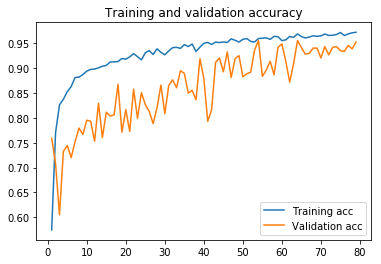

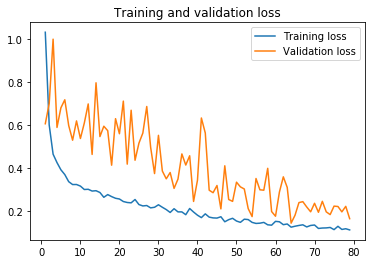

In [6]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

[[49  1  0]
 [ 6 89  0]
 [ 0  0 79]]
Classification Report
              precision    recall  f1-score   support

Early_blight       0.89      0.98      0.93        50
 Late_blight       0.99      0.94      0.96        95
     healthy       1.00      1.00      1.00        79

   micro avg       0.97      0.97      0.97       224
   macro avg       0.96      0.97      0.97       224
weighted avg       0.97      0.97      0.97       224



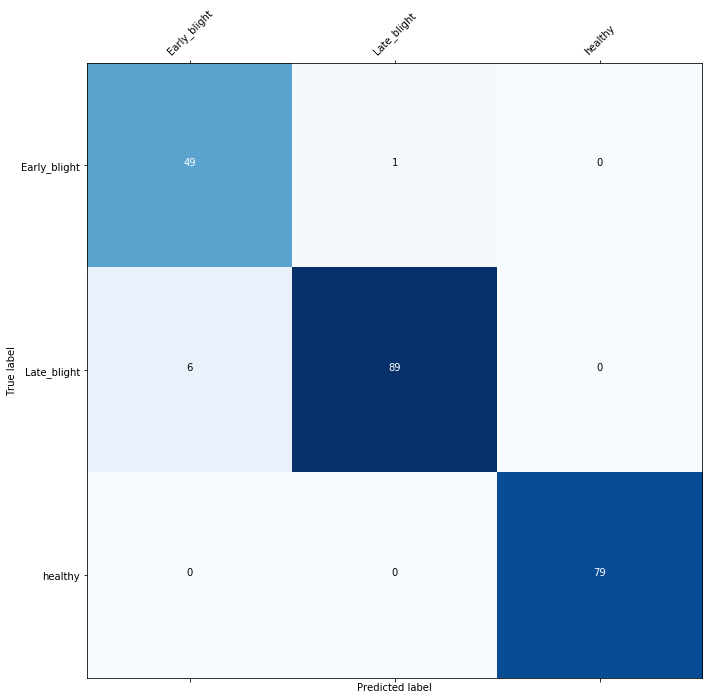

In [8]:
#num_of_test_samples = 2719 
#Y_pred = model.predict_generator(validation_generator, num_of_test_samples // 32+1)
#y_pred = np.argmax(Y_pred, axis=1)
#print('Confusion Matrix')
#print(confusion_matrix(validation_generator.classes, y_pred))

test_generator.reset()
names, index = getTargetNames(test_generator)
num_of_test_samples = 223#674#1072 #1619
steps=np.ceil(num_of_test_samples//32)+1
Y_pred = model.predict_generator(test_generator,steps=steps)
y_pred = np.argmax(Y_pred, axis=1)
#print('Confusion Matrix')
confusion = confusion_matrix(test_generator.classes, y_pred, index)
print(confusion)

classes = range(3)

# create confusion matrix
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(confusion)
cmap=plt.cm.Blues
plt.imshow(confusion, interpolation='nearest', cmap=cmap)
#plt.title('confusion matrix')
#plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, names, rotation=45)
plt.yticks(tick_marks, names)
#plt.yticks(tick_marks, names)

thresh = confusion.max()/2
for i, j in itertools.product(range(confusion.shape[0]), range(confusion.shape[1])):
    plt.text(j, i, confusion[i, j], horizontalalignment='center', color='white' if confusion[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=names))